### **Проект: "Смешанные методы в религиоведении: выявление квазирелигиозных мифов корпораций с помощью компьютерной лингвистики"**

Анна Карасева


В современной экономике ключевым конкурентным преимуществом становятся человеческие ресурсы. Поэтому центральная задача корпораций — не просто привлекать квалифицированные кадры, а формировать устойчивую идентичность, обеспечивающую лояльность и вовлечённость.

Традиционных материальных стимулов для создания прочной эмоциональной связи уже недостаточно. Всё более актуальным становится анализ иррациональных механизмов интеграции, сходных с практиками религиозных институтов, что позволяет говорить о феномене корпоративной квазирелигии.

**Цель работы — проверить следующую гипотезу: внедрение квазирелигиозных элементов в корпоративную культуру повышает лояльность сотрудников.**

В рамках исследования проводится анализ того, как в корпоративной среде мифологизируются история и миссия, формируется ценностный каркас и внедряются символические практики. Ключевым инструментом изучения иррациональной лояльности выступает введённый автором термин **«квазирелигиозный миф»**.

На предыдущих этапах для анализа квазирелигиозного мифа были отобраны четыре компании: X5Group, Яндекс, НЛМК, Сибур. На примере «Яндекса» проведено качественное исследование (сайт, «Яндекс.Книга», глубинные интервью), по итогам которого выделено три базовых мифа:

•	**Миф о демиурге**: Яндекс упорядочивает цифровой хаос, выступая образцом «героя». От сотрудников ожидается вовлечённость на грани самопожертвования (переработки, доступность). Рейтингование по «полезности» создаёт peer pressure и чувство вины.

•	**Миф «свой/чужой»**: риторика превосходства, избранность, табу на обсуждение внутренних тем вовне. Офис как «второй дом» с тотальной инфраструктурой изолирует сотрудника и усиливает зависимость от компании.

•	**Золотой век:** совместное построение светлого технологического будущего. Служит смысловым ядром и мотивирует даже при объективно менее выгодных условиях.

Однако, качественный метод имеет ограничения: сложность доступа к респондентам, малая выборка, высокая трудоёмкость. **Поэтому на основе полученных выводов предпринята попытка автоматизации и формализации дальнейших исследований.** В данной работе были поставлены две основные задачи:

1.	Подтвердить репрезентативность выборки качественного исследования, а также тезисов, которые были отмечены в его рамках

2.	Изучить потенциал использования машинного анализа для проведения религиоведческих исследований, для того, чтобы иметь возможность ускорить исследование корпораций как квазирелигий без прибегания к объемным, сложным и долгим качественным методам.


*Для написания кода использовался Deepseek*

# **Этап 1: Загрузка библиотек**

Чтобы не запутаться и не загружать по несколько раз (пополняется по ходу)

In [ ]:
import time
import random
import re
from tqdm import tqdm

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
import string

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
!pip install pymorphy3

In [ ]:
!pip install pymystem3

In [ ]:
from collections import Counter

import pymorphy3
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

from pymystem3 import Mystem
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
from collections import defaultdict
import math

In [ ]:
import itertools

In [ ]:
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter, defaultdict

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('cointegrated/rubert-tiny')
vector = model.encode("слово")

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import time

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pip install sentence-transformers

In [ ]:
from google.colab import files

# **Этап 2: Парсинг**

In [ ]:
#Парсинг с dreamjob
#Через 2 дня перестал работать, дальше работа ведется с предварительно загруженным файлом

rev = []

for i in tqdm(range(1, 360)): #Количество страниц +1
  try:

      url = f'https://dreamjob.ru/employers/25903?page={i}' #Ссылка c которой нужно забирать данные
      response = requests.get(url)

      soup = BeautifulSoup(response.text)
      for tag in soup.find_all('div', {'class':"review"}):

        header = tag.find('h2', {'class':"review__header-title"}).text.strip()
        minisoup =  tag.find('div', {'class':"review__flex-wrap"})
        exp, pl = minisoup.find_all('div')
        exp = exp.text.strip()
        pl = pl.text.strip()
        pl = re.sub(r'\s+', ' ', pl)
        raiting = re.findall(r'<div class="dj-rating.*?>.*?</', str(tag).replace('\n', ' '))[0].strip()
        raiting = re.findall(r'>(.*)<', raiting)[0].strip()
        like = re.findall(r'Что нравится?(.*?)Что можно улучшить?', str(tag.text).replace('\n', ' '))
        if len(like) > 0:
          like = like[0].lstrip('? ').strip()
        else:
          like = None
        improve = re.findall(r'Что можно улучшить?(.*?)Ответ представителя компании', str(tag.text).replace('\n', ' '))
        if len(improve) > 0:
          improve = improve[0].lstrip('? ').strip()
        else:
          improve = None
        data = [header, exp, pl, raiting, like, improve]

        rev.append(data)

      time.sleep(random.randint(2,6))

  except:
      print(f"Ошибка со страницей: {url}")

In [ ]:
#Визуализация загруженных данных в таблицу

df = pd.DataFrame(rev, columns=['заголовок', 'опыт работы', 'место работы', 'рейтинг', 'нравится', 'можно улучшить'])

In [ ]:
#Выгрузка файла в формате эксель

df.to_excel('отзывы Яндекс.xlsx') #поменять название файла

# **Этап 3: Препроцессинг**


In [ ]:
#Документ для анализа необходимо загрузить в "файлы"
data = pd.read_excel('/content/отзывы Яндекс.xlsx', index_col=0)
data

,заголовок,опыт работы,место работы,рейтинг,нравится,можно улучшить
0,Аналитик-разработчик,Работал 1-2 года,"Москва, январь 2026","4,5","Свободный график, горизонтальная структура и о...",Методы оценки на ревью для одних ролей не прим...
1,UX/UI дизайнер,Работал 3-5 лет,январь 2026,"5,0","Прежде всего, по формату работы было удобно, т...","Порой решения долго доходят до реализации, диз..."
2,DevOps инженер,Работаю 3-5 лет,январь 2026,"5,0","В Яндексе спокойная рабочая атмосфера, нет пос...","Может полдня уходить на встречи, а до задач до..."
3,HR-аналитик,Работал 3-5 лет,январь 2026,"5,0","Пришла в HR-аналитику с уже неплохой базой, но...","Запросов от разных направлений много, иногда п..."
4,Поддержка Яндекс 360,Работал меньше года,"Москва, январь 2026","4,5",Условия для отдыха...Руководство..Коллектив......,Уровень дохода..Условия труда..Возможности рос...
...,...,...,...,...,...,...
3563,Асессор,Работаю меньше года,декабрь 2020,"4,2","Трудовой договор, официальное оформление, бела...","Уровень оплаты труда, графики работы Постоянн..."
3564,Асессор,Бывший сотрудник,"Новосибирск, ноябрь 2020","2,3",Релевантный опыт и первая строчка в резюме тем...,Оплата мизерная. Роста в задачах не предвидитс...
3565,Асессор,Работаю меньше года,"Москва, сентябрь 2020","2,7","Работа на дому, идёт трудовой стаж и грошовые ...","Компания набирает заведомо больше сотрудников,..."
3566,Асессор,Бывший сотрудник,"Санкт-Петербург, декабрь 2019","2,8",Речь пойдет об удаленной работе: асессор-тести...,"-по факту в Яндексе вы числиться не будете, оф..."


In [ ]:
#Соединяем две последние колонки в текст, превращаем его в список строк

processed_text = []

for i, row in data.iterrows():
    review = ' '.join([row['нравится'], row['можно улучшить']]) #названия столбцов, с которыми в дальнейшем нужно работать
    processed_text.append(review)

    if i < 5:
        print(review)
        print('\n--------------------\n')

Свободный график, горизонтальная структура и открытость к инициативам Условия труда идеальный Методы оценки на ревью для одних ролей не приминимы для ролей с задачами иного рода                                                 Полезный отзыв 0                              Ссылка на отзыв

--------------------

Прежде всего, по формату работы было удобно, так как у нас был гибрид, спокойненько работать из дома можно, в офис приезжал, когда нужно что-то обсудить с командой в основном. Не было такого, что кто-то постоянно контролирует каждый твой шаг, только если у тебя ошибки возникают, и то это делают органично очень, и с целью помочь, а не отчитать. Когда у тебя возникают предположения по улучшению работы, прислушиваются, действительно рассматривают Порой решения долго доходят до реализации, дизайн готов, все согласовано, а дальше приходится ждать, пока освободится разработка                                      Преимущества и льготы  Своевременная оплата труда Удаленная работа Медицинс

In [ ]:
#В конце текстов с сайтов загрузилась техническая мусорная информация, обрезаем ее

cleaned_reviews = []
for i, row in data.iterrows():
    review = ' '.join([row['нравится'], row['можно улучшить']])
    pattern = re.compile(r'Полезный отзыв.*', re.IGNORECASE | re.DOTALL)
    cleaned_review = pattern.sub('', review)
    cleaned_review = cleaned_review.strip()
    cleaned_reviews.append(cleaned_review)

    if i < 5:
        print(cleaned_review)
        print('\n--------------------\n')

processed_text = cleaned_reviews

Свободный график, горизонтальная структура и открытость к инициативам Условия труда идеальный Методы оценки на ревью для одних ролей не приминимы для ролей с задачами иного рода

--------------------

Прежде всего, по формату работы было удобно, так как у нас был гибрид, спокойненько работать из дома можно, в офис приезжал, когда нужно что-то обсудить с командой в основном. Не было такого, что кто-то постоянно контролирует каждый твой шаг, только если у тебя ошибки возникают, и то это делают органично очень, и с целью помочь, а не отчитать. Когда у тебя возникают предположения по улучшению работы, прислушиваются, действительно рассматривают Порой решения долго доходят до реализации, дизайн готов, все согласовано, а дальше приходится ждать, пока освободится разработка                                      Преимущества и льготы  Своевременная оплата труда Удаленная работа Медицинское страхование Все 3

--------------------

В Яндексе спокойная рабочая атмосфера, нет постоянных авралов и д

In [ ]:
#Удаляем пунктуацию и цифры

processed_text = [re.sub(r'[^a-zA-Zа-яА-ЯёЁ\s]', ' ', text) for text in processed_text]

for i in range(min(5, len(processed_text))):
    print(processed_text[i])
    print('---')

Свободный график  горизонтальная структура и открытость к инициативам Условия труда идеальный Методы оценки на ревью для одних ролей не приминимы для ролей с задачами иного рода
---
Прежде всего  по формату работы было удобно  так как у нас был гибрид  спокойненько работать из дома можно  в офис приезжал  когда нужно что то обсудить с командой в основном  Не было такого  что кто то постоянно контролирует каждый твой шаг  только если у тебя ошибки возникают  и то это делают органично очень  и с целью помочь  а не отчитать  Когда у тебя возникают предположения по улучшению работы  прислушиваются  действительно рассматривают Порой решения долго доходят до реализации  дизайн готов  все согласовано  а дальше приходится ждать  пока освободится разработка                                      Преимущества и льготы  Своевременная оплата труда Удаленная работа Медицинское страхование Все  
---
В Яндексе спокойная рабочая атмосфера  нет постоянных авралов и дерганья без причины  такое только под 

In [ ]:
#Превращаем каждое слово в токен

tokenized_texts = []
for text in processed_text:
    tokens = word_tokenize(text.lower(), language='russian')
    tokenized_texts.append(tokens)

for i in range(min(5, len(tokenized_texts))):
    print (tokenized_texts[i][:20])
    print(f"Количество токенов: {len(tokenized_texts[i])}")
    print('\n--------------------\n')

total_tokens = sum(len(tokens) for tokens in tokenized_texts)
total_texts = len(tokenized_texts)
avg_tokens_per_text = total_tokens / total_texts if total_texts > 0 else 0


print(f"Всего текстов (документов): {total_texts:,}")
print(f"Всего токенов (слов): {total_tokens:,}")
print(f"Среднее количество токенов на текст: {avg_tokens_per_text:.1f}")

['свободный', 'график', 'горизонтальная', 'структура', 'и', 'открытость', 'к', 'инициативам', 'условия', 'труда', 'идеальный', 'методы', 'оценки', 'на', 'ревью', 'для', 'одних', 'ролей', 'не', 'приминимы']
Количество токенов: 26

--------------------

['прежде', 'всего', 'по', 'формату', 'работы', 'было', 'удобно', 'так', 'как', 'у', 'нас', 'был', 'гибрид', 'спокойненько', 'работать', 'из', 'дома', 'можно', 'в', 'офис']
Количество токенов: 99

--------------------

['в', 'яндексе', 'спокойная', 'рабочая', 'атмосфера', 'нет', 'постоянных', 'авралов', 'и', 'дерганья', 'без', 'причины', 'такое', 'только', 'под', 'конец', 'масштабных', 'проектов', 'может', 'быть']
Количество токенов: 88

--------------------

['пришла', 'в', 'hr', 'аналитику', 'с', 'уже', 'неплохой', 'базой', 'но', 'именно', 'здесь', 'поняла', 'что', 'такое', 'работа', 'с', 'реальными', 'масштабами', 'данных', 'много']
Количество токенов: 74

--------------------

['условия', 'для', 'отдыха', 'руководство', 'коллектив', 'у

In [ ]:
#Создаем список стоп-слов

nltk_stopwords_ru = stopwords.words('russian')
print(nltk_stopwords_ru)
additional_stopwords = {
    'это', 'этого', 'этом', 'эту', 'эти', 'этим', 'этими', 'очень',
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'
    'весь', 'все', 'всё', 'всего', 'всему',
    'какой', 'какая', 'какое', 'какие', 'такого', 'такую', 'такой', 'кого',
    'такое', 'такие', 'таким', 'такими', 'таком', 'тот', 'к', 'этот', 'так',
    'который', 'которая', 'которое', 'которые','который'
    'свой', 'своя', 'своё', 'свои', 'кроме'
    'как', 'так', 'же', 'бы', 'б' 'ли', 'быть', 'есть',
    'мой', 'моя', 'моё', 'мои',
    'твой', 'твоя', 'твоё', 'твои',
    'наш', 'наша', 'наше', 'наши',
    'ваш', 'ваша', 'ваше', 'ваши','около', 'прям', 'кто', '13', '—', 'какой', 'пара'
    'их', 'его', 'её',
    'чтоб', 'чтобы', 'поэтому', 'потому', 'откуда', 'куда', 'зачем', 'почему',
    'между', 'около', 'после', 'перед', 'внутри', 'вне', 'через',
    'ну', 'вот', 'даже', 'точно', 'конечно', 'пожалуйста', 'именно','каждый', 'вообще'
}

extended_stopwords_ru = set(nltk_stopwords_ru).union(additional_stopwords)

print(extended_stopwords_ru)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
#Приводим к строчной букве, удаляем стоп-слова

filtered_tokenized_texts = []
for tokens in tokenized_texts:
    filtered_tokens = [token for token in tokens if token.lower() not in extended_stopwords_ru]
    filtered_tokenized_texts.append(filtered_tokens)

tokenized_texts = filtered_tokenized_texts

for i in range(min(5, len(tokenized_texts))):
    print(tokenized_texts[i])
    print(f"Количество токенов: {len(tokenized_texts[i])}")
    print('\n--------------------\n')

['свободный', 'график', 'горизонтальная', 'структура', 'открытость', 'инициативам', 'условия', 'труда', 'идеальный', 'методы', 'оценки', 'ревью', 'одних', 'ролей', 'приминимы', 'ролей', 'задачами', 'иного', 'рода']
Количество токенов: 19

--------------------

['прежде', 'формату', 'работы', 'удобно', 'гибрид', 'спокойненько', 'работать', 'дома', 'офис', 'приезжал', 'нужно', 'обсудить', 'командой', 'основном', 'постоянно', 'контролирует', 'шаг', 'ошибки', 'возникают', 'делают', 'органично', 'целью', 'помочь', 'отчитать', 'возникают', 'предположения', 'улучшению', 'работы', 'прислушиваются', 'действительно', 'рассматривают', 'порой', 'решения', 'долго', 'доходят', 'реализации', 'дизайн', 'готов', 'согласовано', 'дальше', 'приходится', 'ждать', 'пока', 'освободится', 'разработка', 'преимущества', 'льготы', 'своевременная', 'оплата', 'труда', 'удаленная', 'работа', 'медицинское', 'страхование']
Количество токенов: 54

--------------------

['яндексе', 'спокойная', 'рабочая', 'атмосфера', 

# **Этап 4: Лемматизация и частеречнная разметка**

In [ ]:
#Лемматизируем (приводим слова к начальной форме)

lemmatized_texts = []

for tokens in tokenized_texts:
    lemmatized_tokens = []
    for word in tokens:
        normal_form = morph.parse(word)[0].normal_form
        lemmatized_tokens.append(normal_form)
    lemmatized_texts.append(lemmatized_tokens)

tokenized_texts = lemmatized_texts

for i in range(min(5, len(tokenized_texts))):
    print(tokenized_texts[i])
    print('\n--------------------\n')

['свободный', 'график', 'горизонтальный', 'структура', 'открытость', 'инициатива', 'условие', 'труд', 'идеальный', 'метод', 'оценка', 'ревить', 'один', 'роль', 'приминить', 'роль', 'задача', 'иной', 'род']

--------------------

['прежде', 'формат', 'работа', 'удобно', 'гибрид', 'спокойненький', 'работать', 'дом', 'офис', 'приезжать', 'нужно', 'обсудить', 'команда', 'основное', 'постоянно', 'контролировать', 'шаг', 'ошибка', 'возникать', 'делать', 'органично', 'цель', 'помочь', 'отчитать', 'возникать', 'предположение', 'улучшение', 'работа', 'прислушиваться', 'действительно', 'рассматривать', 'порой', 'решение', 'долго', 'доходить', 'реализация', 'дизайн', 'готовый', 'согласовать', 'далёкий', 'приходиться', 'ждать', 'пока', 'освободиться', 'разработка', 'преимущество', 'льгота', 'своевременный', 'оплата', 'труд', 'удалённый', 'работа', 'медицинский', 'страхование']

--------------------

['яндекс', 'спокойный', 'рабочий', 'атмосфера', 'постоянный', 'аврал', 'дёрганье', 'причина', 'коне

In [ ]:
# Повторное удаление стоп-слов после лемматизации

stop_words = set(stopwords.words('russian'))
tokenized_texts = [[word for word in doc if word not in stop_words] for doc in tokenized_texts]

In [ ]:
#Морфологический анализ и разметка частей речи. Не пригодилось

words_with_pos = []
for tokens in tokenized_texts:
    for word in tokens:
        parse = morph.parse(word)[0]
        pos = parse.tag.POS if parse.tag.POS else 'UNKN'
        words_with_pos.append((word, pos))

for i in range(min(5, len(tokenized_texts))):
    print(tokenized_texts[i])
    print('---')

['свободный', 'график', 'горизонтальный', 'структура', 'открытость', 'инициатива', 'условие', 'труд', 'идеальный', 'метод', 'оценка', 'ревить', 'роль', 'приминить', 'роль', 'задача', 'иной', 'род']
---
['прежде', 'формат', 'работа', 'удобно', 'гибрид', 'спокойненький', 'работать', 'дом', 'офис', 'приезжать', 'нужно', 'обсудить', 'команда', 'основное', 'постоянно', 'контролировать', 'шаг', 'ошибка', 'возникать', 'делать', 'органично', 'цель', 'помочь', 'отчитать', 'возникать', 'предположение', 'улучшение', 'работа', 'прислушиваться', 'действительно', 'рассматривать', 'порой', 'решение', 'долго', 'доходить', 'реализация', 'дизайн', 'готовый', 'согласовать', 'далёкий', 'приходиться', 'ждать', 'пока', 'освободиться', 'разработка', 'преимущество', 'льгота', 'своевременный', 'оплата', 'труд', 'удалённый', 'работа', 'медицинский', 'страхование']
---
['яндекс', 'спокойный', 'рабочий', 'атмосфера', 'постоянный', 'аврал', 'дёрганье', 'причина', 'конец', 'масштабный', 'проект', 'прошлый', 'работа

In [ ]:
#Статистика по токенам, топ-лемм

word_freq = Counter([word for word, pos in words_with_pos]) #самые популяные
all_words = [word for tokens in tokenized_texts for word in tokens]

print(f"Всего документов: {len(tokenized_texts)}")
print(f"Всего токенов во всех документах: {len(all_words)}")
print(f"Уникальных лемм: {len(word_freq)}")
print(f"Среднее количество токенов на документ: {len(all_words) / len(tokenized_texts):.1f}")
print("\n")

print("ТОП слов:")
for i, (word, count) in enumerate(word_freq.most_common(100), 1): #можно поменять количество показываемых слов
    print(f"{i:2}. {word:20} - {count}")

Всего документов: 3568
Всего токенов во всех документах: 147863
Уникальных лемм: 8276
Среднее количество токенов на документ: 41.4


ТОП слов:
 1. оплата               - 5240
 2. работа               - 5038
 3. труд                 - 2828
 4. льгота               - 2757
 5. преимущество         - 2742
 6. своевременный        - 2472
 7. место                - 2356
 8. удалённый            - 2286
 9. график               - 1955
10. рабочий              - 1818
11. больничный           - 1786
12. медицинский          - 1608
13. страхование          - 1604
14. обучение             - 1543
15. корпоративный        - 1530
16. гибкий               - 1506
17. система              - 1400
18. питание              - 1320
19. удобный              - 1285
20. компенсация          - 1263
21. обед                 - 1253
22. наличие              - 1225
23. кухня                - 1220
24. мероприятие          - 1139
25. профессиональный     - 1134
26. наставничество       - 1055
27. расположение         

In [ ]:
#Статистика по частям речи (не пригодилась для последующего анализа)

pos_counts = Counter(pos for _, pos in words_with_pos)

for pos, count in pos_counts.most_common():
    print(f"{pos}: {count} слов ({count/len(words_with_pos)*100:.1f}%)")

print(f"\nВсего слов проанализировано: {len(words_with_pos)}")


NOUN: 86078 слов (58.2%)
ADJF: 31229 слов (21.1%)
INFN: 19602 слов (13.3%)
ADVB: 6045 слов (4.1%)
UNKN: 1762 слов (1.2%)
CONJ: 1064 слов (0.7%)
PRCL: 649 слов (0.4%)
PREP: 406 слов (0.3%)
PRED: 351 слов (0.2%)
NPRO: 343 слов (0.2%)
NUMR: 124 слов (0.1%)
PRTF: 84 слов (0.1%)
INTJ: 70 слов (0.0%)
VERB: 34 слов (0.0%)
ADJS: 16 слов (0.0%)
PRTS: 5 слов (0.0%)
GRND: 1 слов (0.0%)

Всего слов проанализировано: 147863


In [ ]:
# Все токены объединяются в единый список

all_tokens = []
for tokens in tokenized_texts:
    all_tokens.extend(tokens)

print(f"Всего документов: {len(tokenized_texts)}")#Проверяем, что количество совпадает с количеством токенов разделенных по спискам
print(f"Всего токенов во всех документах: {len(all_tokens)}")
print(f"Уникальных лемм: {len(set(all_tokens))}")
print ('\n')
print(all_tokens[:50])

Всего документов: 3568
Всего токенов во всех документах: 147863
Уникальных лемм: 8276


['свободный', 'график', 'горизонтальный', 'структура', 'открытость', 'инициатива', 'условие', 'труд', 'идеальный', 'метод', 'оценка', 'ревить', 'роль', 'приминить', 'роль', 'задача', 'иной', 'род', 'прежде', 'формат', 'работа', 'удобно', 'гибрид', 'спокойненький', 'работать', 'дом', 'офис', 'приезжать', 'нужно', 'обсудить', 'команда', 'основное', 'постоянно', 'контролировать', 'шаг', 'ошибка', 'возникать', 'делать', 'органично', 'цель', 'помочь', 'отчитать', 'возникать', 'предположение', 'улучшение', 'работа', 'прислушиваться', 'действительно', 'рассматривать', 'порой']


# **Этап 5: TF/IDF**


In [ ]:
# Вычисляем TF для каждого документа
tf_per_document = []

for doc_tokens in tokenized_texts:
    doc_length = len(doc_tokens)
    word_counts = {}

    for word in doc_tokens:
        word_counts[word] = word_counts.get(word, 0) + 1

    tf_doc = {word: count/doc_length for word, count in word_counts.items()}
    tf_per_document.append(tf_doc)


sorted_tf = sorted(tf_per_document[0].items(), key=lambda x: x[1], reverse=True)[:10]
for i, (word, tf_value) in enumerate(sorted_tf, 1):
    print(f"{i:2}. {word:20} TF = {tf_value:.6f}")

 1. роль                 TF = 0.111111
 2. свободный            TF = 0.055556
 3. график               TF = 0.055556
 4. горизонтальный       TF = 0.055556
 5. структура            TF = 0.055556
 6. открытость           TF = 0.055556
 7. инициатива           TF = 0.055556
 8. условие              TF = 0.055556
 9. труд                 TF = 0.055556
10. идеальный            TF = 0.055556


In [ ]:
# Вычисляем IDF для всего корпуса
doc_freq = defaultdict(int)

for doc_tokens in tokenized_texts:
    for word in set(doc_tokens):
        doc_freq[word] += 1

total_docs = len(tokenized_texts)
idf = {}

for word, df in doc_freq.items():
    idf[word] = math.log((total_docs + 1) / (df + 1)) + 1

# Топ-20 редких слов (высокий IDF)
print("\nТоп-20 слов по IDF (редкие слова):")
sorted_high_idf = sorted(idf.items(), key=lambda x: x[1], reverse=True)[:20]
for i, (word, idf_val) in enumerate(sorted_high_idf, 1):
    print(f"{i:2}. {word:20} IDF = {idf_val:.4f} (в {doc_freq[word]}/{total_docs} документах)")


Топ-20 слов по IDF (редкие слова):
 1. приминить            IDF = 8.4869 (в 1/3568 документах)
 2. отчитать             IDF = 8.4869 (в 1/3568 документах)
 3. освободиться         IDF = 8.4869 (в 1/3568 документах)
 4. предположение        IDF = 8.4869 (в 1/3568 документах)
 5. органично            IDF = 8.4869 (в 1/3568 документах)
 6. дёрганье             IDF = 8.4869 (в 1/3568 документах)
 7. складывать           IDF = 8.4869 (в 1/3568 документах)
 8. зарплвт              IDF = 8.4869 (в 1/3568 документах)
 9. вариация             IDF = 8.4869 (в 1/3568 документах)
10. сиять                IDF = 8.4869 (в 1/3568 документах)
11. обрабатывать         IDF = 8.4869 (в 1/3568 документах)
12. звёздочка            IDF = 8.4869 (в 1/3568 документах)
13. сп                   IDF = 8.4869 (в 1/3568 документах)
14. кг                   IDF = 8.4869 (в 1/3568 документах)
15. озон                 IDF = 8.4869 (в 1/3568 документах)
16. перекрёсток          IDF = 8.4869 (в 1/3568 документах)
17. 

In [ ]:
# TF-IDF
tfidf_documents = []

for tf_doc in tf_per_document:
    tfidf_doc = {}
    for word, tf_val in tf_doc.items():
        tfidf_doc[word] = tf_val * idf.get(word, 0)  # Теперь idf определен
    tfidf_documents.append(tfidf_doc)

# Топ-10 TF-IDF первого документа
top_tfidf = sorted(tfidf_documents[0].items(),
                   key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слов по TF-IDF (первый документ):")
for i, (word, val) in enumerate(top_tfidf, 1):
    print(f"{i:2}. {word:20} TF-IDF = {val:.6f}")


Топ-10 слов по TF-IDF (первый документ):
 1. роль                 TF-IDF = 0.662352
 2. приминить            TF-IDF = 0.471494
 3. род                  TF-IDF = 0.432986
 4. метод                TF-IDF = 0.359555
 5. иной                 TF-IDF = 0.352602
 6. горизонтальный       TF-IDF = 0.346422
 7. идеальный            TF-IDF = 0.338278
 8. открытость           TF-IDF = 0.301047
 9. структура            TF-IDF = 0.293790
10. инициатива           TF-IDF = 0.270888


In [ ]:
# TF-IDF для всего корпуса
tfidf_corpus = {}

for tf_doc in tf_per_document:
    for word, tf_val in tf_doc.items():
        tfidf_corpus[word] = tfidf_corpus.get(word, 0) + tf_val * idf[word]

tfidf_corpus = {word: val / len(tf_per_document)
                for word, val in tfidf_corpus.items()}

# Топ-20 слов с наибольшим TF-IDF в корпусе
top_tfidf_corpus = sorted(tfidf_corpus.items(),
                          key=lambda x: x[1], reverse=True)[:100]

print("\nТоп-20 слов по среднему TF-IDF во всем корпусе:")
for i, (word, val) in enumerate(top_tfidf_corpus, 1):
    freq = doc_freq.get(word, 0)
    print(f"{i:2}. {word:20} TF-IDF = {val:.6f} (в {freq}/{len(tf_per_document)} док.)")


Топ-20 слов по среднему TF-IDF во всем корпусе:
 1. оплата               TF-IDF = 0.050162 (в 2605/3568 док.)
 2. работа               TF-IDF = 0.048599 (в 2798/3568 док.)
 3. удалённый            TF-IDF = 0.033511 (в 1879/3568 док.)
 4. труд                 TF-IDF = 0.029356 (в 2501/3568 док.)
 5. график               TF-IDF = 0.028340 (в 1591/3568 док.)
 6. льгота               TF-IDF = 0.027603 (в 2733/3568 док.)
 7. преимущество         TF-IDF = 0.027461 (в 2732/3568 док.)
 8. место                TF-IDF = 0.026753 (в 1461/3568 док.)
 9. своевременный        TF-IDF = 0.025712 (в 2409/3568 док.)
10. рабочий              TF-IDF = 0.024870 (в 1562/3568 док.)
11. гибкий               TF-IDF = 0.022263 (в 1384/3568 док.)
12. обучение             TF-IDF = 0.021852 (в 1350/3568 док.)
13. больничный           TF-IDF = 0.020973 (в 1751/3568 док.)
14. система              TF-IDF = 0.020238 (в 1264/3568 док.)
15. корпоративный        TF-IDF = 0.020015 (в 1169/3568 док.)
16. возможность      

In [ ]:
# Топ-200 из TF-IDF корпуса
tfidf_top_100 = set(word for word, _ in sorted(tfidf_corpus.items(),
                                                key=lambda x: x[1], reverse=True)[:200])

# Топ-200 из частотного словаря
freq_top_100 = set(word for word, _ in word_freq.most_common(200))

# Слова, которые есть только в TF-IDF
only_in_tfidf = tfidf_top_100 - freq_top_100

# Слова, которые есть только в частотном словаре
only_in_freq = freq_top_100 - tfidf_top_100

print(f"Коэффициент Жаккара: {len(tfidf_top_100 & freq_top_100) / len(tfidf_top_100 | freq_top_100):.3f}")
print(f"\nСлова только в TF-IDF топ-200 ({len(only_in_tfidf)}):")
for i, word in enumerate(sorted(only_in_tfidf)[:15], 1):
    print(f"{i:2}. {word}")

print(f"\nСлова только в частотном топ-200 ({len(only_in_freq)}):")
for i, word in enumerate(sorted(only_in_freq)[:15], 1):
    print(f"{i:2}. {word}")

Коэффициент Жаккара: 0.905

Слова только в TF-IDF топ-200 (10):
 1. выплата
 2. дружный
 3. мало
 4. официальный
 5. платить
 6. повысить
 7. помощь
 8. работник
 9. трудоустройство
10. увеличить

Слова только в частотном топ-200 (10):
 1. аналитик
 2. бюрократия
 3. неделя
 4. ниже
 5. никакой
 6. общий
 7. полный
 8. прийти
 9. сторона
10. чувствовать


# **Этап 6: Коллокации: PMI, T-Score, LLH**

In [ ]:
# PMI с окном 3

import math
from collections import Counter

flat_words = [word for word, _ in words_with_pos]
word_freq = Counter(flat_words)
total_words = len(flat_words)

# Генерация пар в окне 3
window_size = 3
pair_freq = Counter()

for i in range(len(flat_words)):
    start = i
    end = min(i + window_size, len(flat_words))
    words_in_window = flat_words[start:end]

    for j in range(len(words_in_window)):
        for k in range(j + 1, len(words_in_window)):
            word1 = words_in_window[j]
            word2 = words_in_window[k]

            if word1 < word2:
                pair = (word1, word2)
            else:
                pair = (word2, word1)

            pair_freq[pair] += 1

MIN_PAIR_FREQ = 7  # пары должны встречаться минимум 7 раз
filtered_pairs = {pair: freq for pair, freq in pair_freq.items()
                  if freq >= MIN_PAIR_FREQ}

MIN_WORD_FREQ = 7  # каждое слово должно встречаться минимум 7 раз
filtered_pairs = {pair: freq for pair, freq in filtered_pairs.items()
                  if word_freq[pair[0]] >= MIN_WORD_FREQ and
                     word_freq[pair[1]] >= MIN_WORD_FREQ}

# PMI расчет
pmi_scores = {}
total_pairs = sum(pair_freq.values())

for (word1, word2), freq_AB in filtered_pairs.items():
    freq_A = word_freq[word1]
    freq_B = word_freq[word2]

    P_A = freq_A / total_words
    P_B = freq_B / total_words
    P_AB = freq_AB / total_pairs

    if P_A > 0 and P_B > 0 and P_AB > 0:
        pmi = math.log2(P_AB / (P_A * P_B))
        pmi_scores[(word1, word2)] = {
            'pmi': pmi,
            'freq_pair': freq_AB,      # сколько раз вместе
            'freq_word1': freq_A,      # сколько раз слово 1
            'freq_word2': freq_B,      # сколько раз слово 2
            'expected': P_A * P_B * total_pairs  # ожидаемая частота
        }


MIN_PMI = 1.0  # минимальное значение PMI
filtered_pmi = {pair: data for pair, data in pmi_scores.items()
                if data['pmi'] >= MIN_PMI}


sorted_pmi = sorted(filtered_pmi.items(),
                    key=lambda x: x[1]['pmi'],
                    reverse=True)[:100]

print("ТОП-30 ПАР ПО PMI")
print(f"Фильтры: пары ≥ {MIN_PAIR_FREQ} раз, слова ≥ {MIN_WORD_FREQ} раз, PMI ≥ {MIN_PMI}")
print(f"Всего пар после фильтрации: {len(filtered_pmi)}")

for i, ((word1, word2), data) in enumerate(sorted_pmi, 1):
    pmi_val = data['pmi']
    freq_pair = data['freq_pair']
    freq_w1 = data['freq_word1']
    freq_w2 = data['freq_word2']

    print(f"{i:2}. {word1:10} — {word2:10}")
    print(f"     PMI = {pmi_val:6.3f})")
    print(f"     Вместе: {freq_pair:4} раз ")
    print(f"     '{word1}': {freq_w1:4} раз | '{word2}': {freq_w2:4} раз")
    print()

#Статистика
if filtered_pmi:
    pmis = [data['pmi'] for data in filtered_pmi.values()]
    avg_pmi = sum(pmis) / len(pmis)
    max_pmi = max(pmis)


    print(f"Средний PMI: {avg_pmi:.3f}")
    print(f"Максимальный PMI: {max_pmi:.3f}")
    print(f"Пар с PMI > 6.0: {sum(1 for p in pmis if p > 6.0)}")
    print(f"Пар с PMI > 3.0: {sum(1 for p in pmis if p > 3.0)}")
    print(f"Пар с PMI > 1.0: {sum(1 for p in pmis if p > 1.0)}")

ТОП-30 ПАР ПО PMI
Фильтры: пары ≥ 7 раз, слова ≥ 7 раз, PMI ≥ 1.0
Всего пар после фильтрации: 4077
 1. cd         — ci        
     PMI = 13.419)
     Вместе:   16 раз 
     'cd':    8 раз | 'ci':    9 раз

 2. лист       — чек       
     PMI = 13.226)
     Вместе:   14 раз 
     'лист':    9 раз | 'чек':    8 раз

 3. дверь      — закрытый  
     PMI = 12.974)
     Вместе:    8 раз 
     'дверь':    7 раз | 'закрытый':    7 раз

 4. бумажный   — волокита  
     PMI = 12.782)
     Вместе:    8 раз 
     'бумажный':    8 раз | 'волокита':    7 раз

 5. balance    — life      
     PMI = 12.412)
     Вместе:   23 раз 
     'balance':   13 раз | 'life':   16 раз

 6. овощ       — фрукт     
     PMI = 12.341)
     Вместе:   18 раз 
     'овощ':    9 раз | 'фрукт':   19 раз

 7. занятость  — частичный 
     PMI = 12.322)
     Вместе:    8 раз 
     'занятость':   11 раз | 'частичный':    7 раз

 8. life       — work      
     PMI = 12.174)
     Вместе:   30 раз 
     'life':   16 раз | '

In [ ]:
#T-Score окно 3

window_size = 3
pair_freq = Counter()

# Все пары слов в пределах окна 3
for i in range(len(flat_words)):
    for j in range(i + 1, min(i + window_size + 1, len(flat_words))):
        word1 = flat_words[i]
        word2 = flat_words[j]

        # Упорядочиваем для уникальности
        if word1 < word2:
            pair = (word1, word2)
        else:
            pair = (word2, word1)

        pair_freq[pair] += 1

# Вычисляем N - общее количество слов в корпусе
N = len(flat_words)
print(f"Общее количество слов в корпусе (N): {N}")

if 'word_freq' not in locals():
    word_freq = Counter(flat_words)
    print(f"Уникальных слов: {len(word_freq)}")

# T-SCORE для всех пар
t_scores_window = {}
for (w1, w2), observed in pair_freq.items():
    if observed >= 2:
        f1 = word_freq[w1]
        f2 = word_freq[w2]
        expected = (f1 * f2) / N

        if observed > 0:
            t_score = (observed - expected) / math.sqrt(observed)
            t_scores_window[(w1, w2)] = t_score

print(f"Уникальных пар в окне {window_size}: {len(pair_freq)}")
print(f"Пар с t-score: {len(t_scores_window)}")

# Сортируем и выводим ТОП-20
top_pairs = sorted(t_scores_window.items(), key=lambda x: x[1], reverse=True)[:100]

print("ТОП ПАР T-SCORE:")
for i, ((w1, w2), t) in enumerate(top_pairs, 1):
    obs = pair_freq[(w1, w2)]
    f1 = word_freq[w1]
    f2 = word_freq[w2]
    expected = (f1 * f2) / N
    print(f"{i:2}. {w1} {w2}: t={t:.2f}, набл={obs}, ожид={expected:.1f}")

Общее количество слов в корпусе (N): 147863
Уникальных пар в окне 3: 190785
Пар с t-score: 38743
ТОП ПАР T-SCORE:
 1. оплата труд: t=53.49, набл=3058, ожид=100.2
 2. работа удалённый: t=52.40, набл=2899, ожид=77.9
 3. льгота преимущество: t=51.34, набл=2737, ожид=51.1
 4. льгота труд: t=48.45, набл=2452, ожид=52.7
 5. своевременный труд: t=48.42, набл=2438, ожид=47.3
 6. льгота оплата: t=48.15, набл=2510, ожид=97.7
 7. преимущество своевременный: t=48.07, набл=2402, ожид=45.8
 8. льгота своевременный: t=48.07, набл=2402, ожид=46.1
 9. оплата преимущество: t=47.71, набл=2467, ожид=97.2
10. оплата своевременный: t=47.62, набл=2440, ожид=87.6
11. больничный оплата: t=41.95, набл=1884, ожид=63.3
12. работа труд: t=41.77, набл=1933, ожид=96.4
13. работа расположение: t=39.57, набл=1635, ожид=34.9
14. медицинский страхование: t=39.53, набл=1597, ожид=17.4
15. оплата страхование: t=38.10, набл=1563, ожид=56.8
16. гибкий график: t=37.87, набл=1474, ожид=19.9
17. медицинский оплата: t=37.87, на

In [ ]:
#Loglikelyhood

flat_words = [word for word, _ in words_with_pos] if isinstance(words_with_pos[0], tuple) else words_with_pos
N = len(flat_words)

word_freq = Counter(flat_words)
bigram_freq = Counter((flat_words[i], flat_words[i+1]) for i in range(len(flat_words)-1))

# LLR функция
def llr_ratio(k11, k12, k21, k22):
    """Log-Likelihood Ratio для таблицы 2x2"""
    total = k11 + k12 + k21 + k22
    e11 = (k11+k12)*(k11+k21)/total
    e12 = (k11+k12)*(k12+k22)/total
    e21 = (k21+k22)*(k11+k21)/total
    e22 = (k21+k22)*(k12+k22)/total

    llr = 0
    if k11>0 and e11>0: llr += k11*math.log(k11/e11)
    if k12>0 and e12>0: llr += k12*math.log(k12/e12)
    if k21>0 and e21>0: llr += k21*math.log(k21/e21)
    if k22>0 and e22>0: llr += k22*math.log(k22/e22)

    return 2*llr

# Расчёт
results = []
for (w1, w2), k11 in bigram_freq.items():
    if k11 >= 3:
        f1, f2 = word_freq[w1], word_freq[w2]
        k12, k21 = f1-k11, f2-k11
        k22 = N - (k11+k12+k21)

        if k22 > 0:
            llr = llr_ratio(k11, k12, k21, k22)
            results.append((w1, w2, llr, k11))

results.sort(key=lambda x: x[2], reverse=True)

print("ТОП ПО LLR:")
for i, (w1, w2, llr, freq) in enumerate(results[:100], 1):
    sig = "***" if llr>10.83 else "**" if llr>6.63 else "*" if llr>3.84 else ""
    print(f"{i:2}. {w1} {w2}: LLR={llr:.1f}{sig}, частота={freq}")

ТОП ПО LLR:
 1. преимущество льгота: LLR=26804.2***, частота=2732
 2. льгота своевременный: LLR=21764.9***, частота=2400
 3. медицинский страхование: LLR=17418.0***, частота=1597
 4. оплата труд: LLR=17325.2***, частота=2600
 5. своевременный оплата: LLR=16922.3***, частота=2417
 6. удалённый работа: LLR=13649.8***, частота=2079
 7. наличие кухня: LLR=13370.0***, частота=1195
 8. компенсация питание: LLR=12420.8***, частота=1189
 9. оплата больничный: LLR=11891.5***, частота=1744
10. гибкий рабочий: LLR=11704.1***, частота=1312
11. рабочий график: LLR=10839.2***, частота=1347
12. система наставничество: LLR=10713.1***, частота=1044
13. удобный расположение: LLR=10615.7***, частота=1011
14. кухня место: LLR=10386.6***, частота=1195
15. место обед: LLR=10161.3***, частота=1195
16. корпоративный мероприятие: LLR=10120.0***, частота=1060
17. профессиональный обучение: LLR=9950.6***, частота=1050
18. обед медицинский: LLR=9707.5***, частота=1078
19. страхование оплата: LLR=7444.3***, частот

# **Этап 7: Векторизация и кластеризация коллокаций**


In [ ]:
unique_tokens = list(set(all_tokens))
print(f"Уникальных токенов: {len(unique_tokens)} из {len(all_tokens)}")

Уникальных токенов: 8276 из 147863


In [ ]:
# Векторизация уникальных токенов
unique_vectors = model.encode(unique_tokens)

# Проверка
print(f"Векторизовано: {len(unique_tokens)} токенов")
print(f"Размер векторов: {unique_vectors.shape}")

Векторизовано: 8276 токенов
Размер векторов: (8276, 312)


In [ ]:
# Векторизуем батчами
batch_size = 100
vectors = []

for i in range(0, len(unique_tokens), batch_size):
    batch = unique_tokens[i:i+batch_size]
    batch_vectors = model.encode(batch)
    vectors.append(batch_vectors)
    print(f"Обработано {min(i+batch_size, len(unique_tokens))}/{len(unique_tokens)} токенов")

# Объединяем все векторы
unique_vectors = np.vstack(vectors)
print(f"Готово. Векторов: {unique_vectors.shape[0]}")

Обработано 100/8276 токенов
Обработано 200/8276 токенов
Обработано 300/8276 токенов
Обработано 400/8276 токенов
Обработано 500/8276 токенов
Обработано 600/8276 токенов
Обработано 700/8276 токенов
Обработано 800/8276 токенов
Обработано 900/8276 токенов
Обработано 1000/8276 токенов
Обработано 1100/8276 токенов
Обработано 1200/8276 токенов
Обработано 1300/8276 токенов
Обработано 1400/8276 токенов
Обработано 1500/8276 токенов
Обработано 1600/8276 токенов
Обработано 1700/8276 токенов
Обработано 1800/8276 токенов
Обработано 1900/8276 токенов
Обработано 2000/8276 токенов
Обработано 2100/8276 токенов
Обработано 2200/8276 токенов
Обработано 2300/8276 токенов
Обработано 2400/8276 токенов
Обработано 2500/8276 токенов
Обработано 2600/8276 токенов
Обработано 2700/8276 токенов
Обработано 2800/8276 токенов
Обработано 2900/8276 токенов
Обработано 3000/8276 токенов
Обработано 3100/8276 токенов
Обработано 3200/8276 токенов
Обработано 3300/8276 токенов
Обработано 3400/8276 токенов
Обработано 3500/8276 то

In [ ]:
# 5 примеров токенов и их векторов
for i in range(5):
    print(f"{unique_tokens[i]} - вектор: {unique_vectors[i][:3]}... (полный размер: {unique_vectors[i].shape})")

учить - вектор: [ 0.35827053 -0.33390355  0.02717842]... (полный размер: (312,))
выпить - вектор: [ 0.44328436 -0.2828556  -0.10468133]... (полный размер: (312,))
перечислить - вектор: [-0.65267926 -0.37396574 -0.13232914]... (полный размер: (312,))
водить - вектор: [-0.04497343 -0.56079173 -0.12653664]... (полный размер: (312,))
наваливаться - вектор: [ 0.16434045 -0.731657    0.5297444 ]... (полный размер: (312,))


In [ ]:
# Создаем словарь для быстрого доступа к векторам по токенам
token_to_vec = {token: vector for token, vector in zip(unique_tokens, unique_vectors)}

In [ ]:
# Фильтруем все пары с PMI > 1
pmi_threshold = 1
high_pmi_all = [(pair, data) for pair, data in pmi_scores.items()
                if data['pmi'] > pmi_threshold]

print(f"Всего пар с PMI > {pmi_threshold}: {len(high_pmi_all)}")

# Векторизуем все доступные пары
all_pair_vectors = []
all_pair_names = []
all_pair_pmis = []
missing_pairs = []

for (word1, word2), data in high_pmi_all:
    if word1 in token_to_vec and word2 in token_to_vec:
        sum_vector = token_to_vec[word1] + token_to_vec[word2]
        all_pair_vectors.append(sum_vector)
        all_pair_names.append(f"{word1}+{word2}")
        all_pair_pmis.append(data['pmi'])
    else:
        missing_pairs.append((word1, word2, data['pmi']))

# Преобразуем в numpy array
all_pair_vectors = np.array(all_pair_vectors)

print(f"\nУдалось векторизовать: {len(all_pair_vectors)} пар")
print(f"Не удалось векторизовать: {len(missing_pairs)} пар")

# Примеры успешно векторизованных пар
if len(all_pair_vectors) > 0:
    print(f"\nПервые 5 векторизованных пар:")
    for i in range(min(5, len(all_pair_vectors))):
        print(f"{i+1}. {all_pair_names[i]} (PMI={all_pair_pmis[i]:.2f})")
        print(f"   Размер вектора: {all_pair_vectors[i].shape}")

# Примеры пропущенных пар
if missing_pairs:
    print(f"\nПримеры пропущенных пар (нет вектора для слов):")
    for word1, word2, pmi in missing_pairs[:10]:
        has_word1 = word1 in word_to_vector
        has_word2 = word2 in word_to_vector
        print(f"  {word1}+{word2} (PMI={pmi:.2f}) - "
              f"word1: {'✓' if has_word1 else '✗'}, "
              f"word2: {'✓' if has_word2 else '✗'}")

# Сохраняем все данные для дальнейшего использования
pair_vectors = all_pair_vectors
pair_names = all_pair_names
pair_pmi_values = all_pair_pmis

print(f"\nДанные сохранены:")
print(f"  pair_vectors: {pair_vectors.shape}")
print(f"  pair_names: {len(pair_names)} пар")
print(f"  pair_pmi_values: {len(pair_pmi_values)} значений")

Всего пар с PMI > 1: 4077

Удалось векторизовать: 4077 пар
Не удалось векторизовать: 0 пар

Первые 5 векторизованных пар:
1. график+свободный (PMI=5.36)
   Размер вектора: (312,)
2. труд+условие (PMI=3.63)
   Размер вектора: (312,)
3. идеальный+условие (PMI=4.95)
   Размер вектора: (312,)
4. оценка+ревить (PMI=6.03)
   Размер вектора: (312,)
5. задача+иной (PMI=4.53)
   Размер вектора: (312,)

Данные сохранены:
  pair_vectors: (4077, 312)
  pair_names: 4077 пар
  pair_pmi_values: 4077 значений


In [ ]:
# Показываем сложенные векторы для первых 5 пар
for i in range(min(5, len(pair_names))):
    name = pair_names[i]
    pmi = pair_pmi_values[i]
    vector = pair_vectors[i]

    print(f"{i+1}. {name} (PMI={pmi:.2f})")
    print(f"   Вектор (первые 10 значений): {vector[:10]}")
    print(f"   Размерность: {vector.shape}")
    print(f"   Норма вектора: {np.linalg.norm(vector):.3f}")
    print()

1. график+свободный (PMI=5.36)
   Вектор (первые 10 значений): [-0.04685552  0.61965144  0.66768396 -1.8657122  -1.2800634   1.7098174
  0.3357664  -0.21126968 -0.8714102  -1.4430759 ]
   Размерность: (312,)
   Норма вектора: 23.616

2. труд+условие (PMI=3.63)
   Вектор (первые 10 значений): [ 0.2586428  -0.51763695 -0.36213416 -1.6008153  -1.1576463   1.1564834
  0.57116437 -0.2813049  -0.96020204 -0.3832908 ]
   Размерность: (312,)
   Норма вектора: 23.879

3. идеальный+условие (PMI=4.95)
   Вектор (первые 10 значений): [ 0.4897874   0.25339276 -0.3200773  -2.5289502  -0.5137897   1.626928
  0.05945304  0.6591419  -1.4714161  -0.2530923 ]
   Размерность: (312,)
   Норма вектора: 22.332

4. оценка+ревить (PMI=6.03)
   Вектор (первые 10 значений): [-1.6097836  -0.24855998 -0.28852335 -1.5487394  -1.4726362   1.3961406
 -0.09091893 -0.56918216 -0.46180612 -1.129741  ]
   Размерность: (312,)
   Норма вектора: 23.524

5. задача+иной (PMI=4.53)
   Вектор (первые 10 значений): [-1.0480742  

In [ ]:
#Кластеризация сложенных векторов коллокаций
print("\n🔍 Поиск оптимального количества кластеров...")

max_clusters = min(50, len(pair_names) // 5)
best_clusters = {}
best_noise = []
optimal_k = 2

for k in range(2, max_clusters + 1):
    if k > len(pair_names):
        break

    print(f"  Пробуем {k} кластеров...", end=" ")

    # Кластеризуем
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(pair_vectors)

    # Вычисляем расстояния
    distances = kmeans.transform(pair_vectors)
    min_distances = distances.min(axis=1)

    # Формируем группы
    clusters_temp = {}
    for name, label, distance, pmi in zip(
        pair_names,
        labels,
        min_distances,
        pair_pmi_values
    ):
        if label not in clusters_temp:
            clusters_temp[label] = []
        clusters_temp[label].append({'pair': name, 'pmi': pmi, 'distance': distance})

    # Проверяем условие: среднее расстояние в группе ≤ 8.0
    valid_groups = {}
    invalid_groups = []

    for label in clusters_temp:
        pairs = clusters_temp[label]
        avg_distance = np.mean([item['distance'] for item in pairs])

        if avg_distance <= 8:
            # Сортируем по PMI (высокий PMI сначала)
            pairs.sort(key=lambda x: x['pmi'], reverse=True)
            valid_groups[label] = pairs
        else:
            # Вся группа невалидна
            invalid_groups.extend(pairs)

    if len(valid_groups) > 0:
        print(f"✓ Найдено {len(valid_groups)} валидных групп")

        # Сохраняем лучший результат (максимальное количество валидных групп)
        if len(valid_groups) > len(best_clusters):
            best_clusters = valid_groups
            best_noise = invalid_groups
            optimal_k = k
    else:
        print(f"Нет валидных групп")

print(f"\n Оптимальное количество кластеров: {optimal_k}")
print(f"Создано {len(best_clusters)} тематических групп (из {optimal_k} возможных)")

# Присваиваем результаты
clusters = best_clusters
noise_cluster = best_noise

# Сортируем шум по PMI
noise_cluster.sort(key=lambda x: x['pmi'], reverse=True)

# Выводим основную статистику
print(f"   - Валидные тематические группы: {len(clusters)}")
print(f"   - Коллокаций в валидных группах: {sum(len(clusters[label]) for label in clusters)}")
print(f"   - Коллокаций в группе шума: {len(noise_cluster)}")
print(f"   - % шума от общего числа: {len(noise_cluster)/len(pair_names)*100:.1f}%")

if clusters:
    # Общая статистика по расстояниям
    all_distances = []
    for label in clusters:
        for item in clusters[label]:
            all_distances.append(item['distance'])

    overall_avg_distance = np.mean(all_distances)
    print(f"\n Среднее расстояние до центроида среди всех валидных групп: {overall_avg_distance:.4f}")
    print(f"Максимальное расстояние в валидных группах: {max(all_distances):.4f}")

# Выводим валидные тематические группы
print("📋 ВАЛИДНЫЕ ГРУППЫ (ср.расст. ≤ 8.0):")

if not clusters:
    print("Не удалось сформировать валидные группы с заданным условием")
else:
    for label in sorted(clusters.keys()):
        pairs = clusters[label]

        # Вычисляем статистику группы
        avg_distance = np.mean([item['distance'] for item in pairs])
        avg_pmi = np.mean([item['pmi'] for item in pairs])
        max_pmi = max([item['pmi'] for item in pairs])
        min_pmi = min([item['pmi'] for item in pairs])

        print(f"      Среднее расстояние до центроида: {avg_distance:.4f}")
        print(f"      Средний PMI: {avg_pmi:.4f}")
        print(f"      Диапазон PMI: {min_pmi:.4f} - {max_pmi:.4f}")
        print(f"      Мин. расстояние: {min([item['distance'] for item in pairs]):.4f}")
        print(f"      Макс. расстояние: {max([item['distance'] for item in pairs]):.4f}")

        top_pairs = [item['pair'] for item in pairs[:10]]
        print(f"\n Топ-10 коллокаций:")
        for i, pair in enumerate(top_pairs, 1):
            distance = next(item['distance'] for item in pairs if item['pair'] == pair)
            pmi = next(item['pmi'] for item in pairs if item['pair'] == pair)
            print(f"      {i:2d}. {pair:30s} - PMI: {pmi:.3f}, расстояние: {distance:.4f}")

# Выводим группу шума, если она не пустая
if noise_cluster:
    print(f"ГРУППА ШУМА ({len(noise_cluster)} коллокаций):")
    print(f"Коллокации из групп, где среднее расстояние > 8.0")

    # Статистика шума
    avg_noise_distance = np.mean([item['distance'] for item in noise_cluster])
    avg_noise_pmi = np.mean([item['pmi'] for item in noise_cluster])
    print(f"Статистика шума:")
    print(f"Среднее расстояние: {avg_noise_distance:.4f}")
    print(f"Средний PMI: {avg_noise_pmi:.4f}")
    print(f"Мин. расстояние: {min([item['distance'] for item in noise_cluster]):.4f}")
    print(f"Макс. расстояние: {max([item['distance'] for item in noise_cluster]):.4f}")

    # Топ коллокаций из шума
    top_noise_pairs = [item['pair'] for item in noise_cluster[:15]]
    print(f"\n Топ-15 коллокаций из шума (по PMI):")
    for i in range(0, len(top_noise_pairs), 5):
        print(f"      {', '.join(top_noise_pairs[i:i+5])}")

    # Самые сильные коллокации в шуме
    print(f"\n Самые сильные коллокации в шуме (высокий PMI):")
    for i, item in enumerate(noise_cluster[:10], 1):
        print(f"      {i:2d}. {item['pair']:30s} - PMI: {item['pmi']:.3f}, "
              f"расстояние: {item['distance']:.4f}")
else:
    print(f"\n Все коллокации успешно сгруппированы в валидные группы!")



🔍 Поиск оптимального количества кластеров...
  Пробуем 2 кластеров... Нет валидных групп
  Пробуем 3 кластеров... Нет валидных групп
  Пробуем 4 кластеров... Нет валидных групп
  Пробуем 5 кластеров... Нет валидных групп
  Пробуем 6 кластеров... Нет валидных групп
  Пробуем 7 кластеров... ✓ Найдено 1 валидных групп
  Пробуем 8 кластеров... ✓ Найдено 2 валидных групп
  Пробуем 9 кластеров... ✓ Найдено 3 валидных групп
  Пробуем 10 кластеров... ✓ Найдено 3 валидных групп
  Пробуем 11 кластеров... ✓ Найдено 4 валидных групп
  Пробуем 12 кластеров... ✓ Найдено 5 валидных групп
  Пробуем 13 кластеров... ✓ Найдено 5 валидных групп
  Пробуем 14 кластеров... ✓ Найдено 7 валидных групп
  Пробуем 15 кластеров... ✓ Найдено 6 валидных групп
  Пробуем 16 кластеров... ✓ Найдено 9 валидных групп
  Пробуем 17 кластеров... ✓ Найдено 10 валидных групп
  Пробуем 18 кластеров... ✓ Найдено 10 валидных групп
  Пробуем 19 кластеров... ✓ Найдено 11 валидных групп
  Пробуем 20 кластеров... ✓ Найдено 13 валидн


 Визуализация t-SNE...


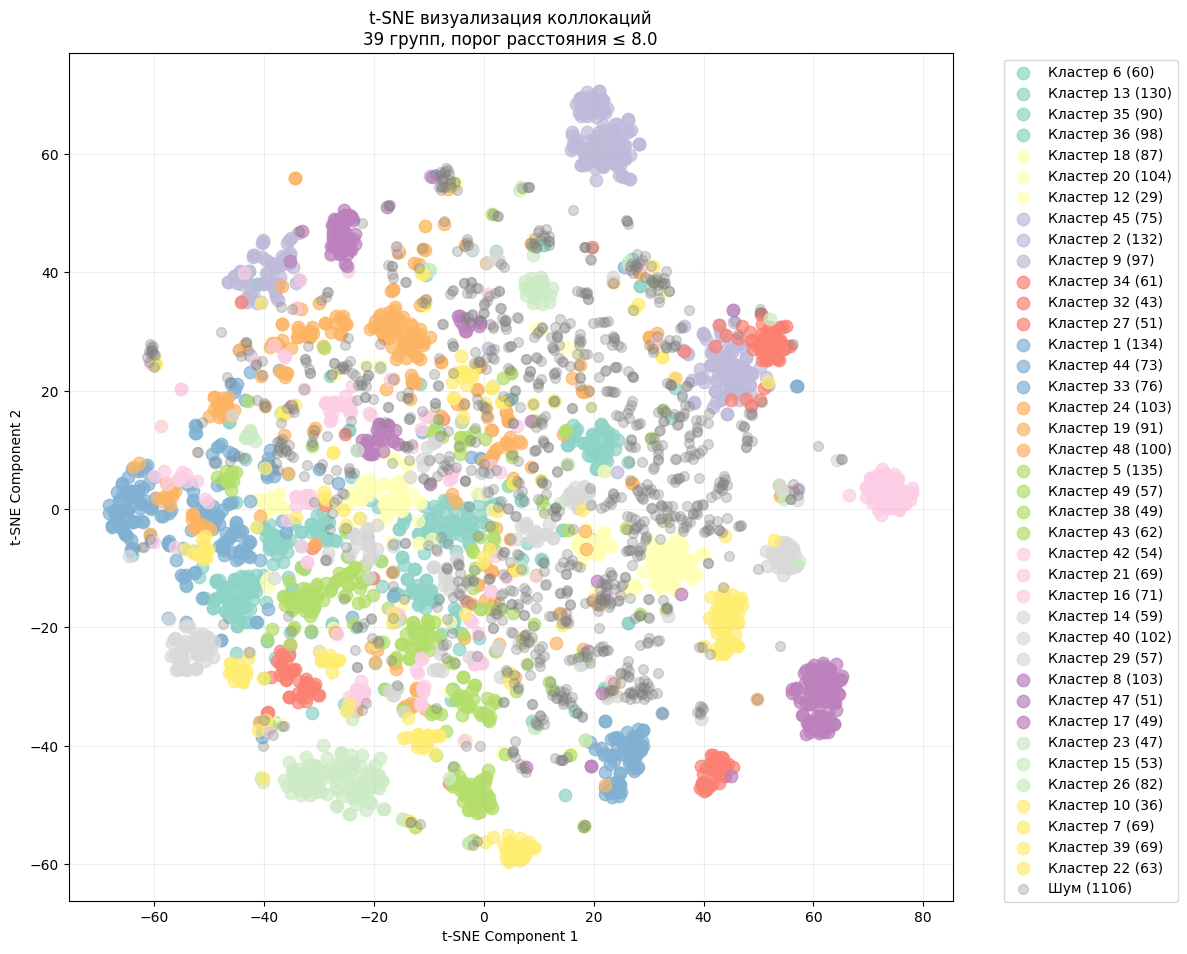

In [ ]:
# Визуализация t-SNE

print("\n Визуализация t-SNE...")

# Создаем список цветов для кластеров
import matplotlib.pyplot as plt


# Определяем цвета для кластеров
colors = plt.cm.Set3(np.linspace(0, 1, len(clusters)))  # или plt.cm.tab10, plt.cm.Paired и т.д.

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
vectors_2d_tsne = tsne.fit_transform(pair_vectors)

plt.figure(figsize=(12, 10))

for i, (label, pairs) in enumerate(clusters.items()):
    indices = [j for j, name in enumerate(pair_names)
              if any(item['pair'] == name for item in pairs)]
    plt.scatter(vectors_2d_tsne[indices, 0], vectors_2d_tsne[indices, 1],
               color=colors[i], s=80, alpha=0.7,
               label=f'Кластер {label} ({len(pairs)})')

if noise_cluster:
    noise_indices = [j for j, name in enumerate(pair_names)
                    if any(item['pair'] == name for item in noise_cluster)]
    if noise_indices:
        plt.scatter(vectors_2d_tsne[noise_indices, 0], vectors_2d_tsne[noise_indices, 1],
                   color='gray', s=50, alpha=0.3, label=f'Шум ({len(noise_cluster)})')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f't-SNE визуализация коллокаций\n{len(clusters)} групп, порог расстояния ≤ 8.0')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:
print("Сохраняю и скачиваю файл...")

# Создаем список всех коллокаций
all_data = []
for cluster_id, items in clusters.items():
    for item in items:
        # Безопасное извлечение данных
        collocation = item.get('pair') or item.get('collocation') or str(item)
        pmi = item.get('pmi', 0)
        distance = item.get('distance', 0)

        all_data.append({
            'Кластер': cluster_id,
            'Коллокация': collocation,
            'PMI': pmi,
            'Расстояние': distance
        })

# Добавляем шум
for item in noise_cluster:
    collocation = item.get('pair') or item.get('collocation') or str(item)
    pmi = item.get('pmi', 0)
    distance = item.get('distance', 0)

    all_data.append({
        'Кластер': 'Шум',
        'Коллокация': collocation,
        'PMI': pmi,
        'Расстояние': distance
    })

# Создаем DataFrame и сохраняем
df = pd.DataFrame(all_data)
filename = 'все_коллокации.xlsx'
df.to_excel(filename, index=False)

# Скачиваем
files.download(filename)
print(f"Файл '{filename}' готов!")
print(f"Сохранено {len(all_data)} записей")

Сохраняю и скачиваю файл...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Файл 'все_коллокации.xlsx' готов!
Сохранено 4077 записей


# **Этап 7: Кластеризация токенов**

In [ ]:
# Код загружается больше 20 миннут. Дальше работа происходит с файлом с результатами

print("Группировка слов с автоматическим определением количества групп")

# Фильтруем слова
token_counter = Counter(all_tokens)
# Берем слова, которые встречаются хотя бы 1 раз
significant_tokens = [word for word, count in token_counter.items() if count >= 1]

print(f"Анализируем {len(significant_tokens)} значимых слов")

# Адаптивный подбор количества кластеров
print("\n Поиск оптимального количества кластеров...")

max_clusters = min(50, len(significant_tokens) // 10)  # Максимум 50 кластеров
best_clusters = {}
best_noise = []
optimal_k = 2

for k in range(2, max_clusters + 1):
    if k > len(significant_tokens):
        break

    print(f"  Пробуем {k} кластеров...", end=" ")

    # Кластеризуем
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(embeddings)

    # Вычисляем расстояния
    distances = kmeans.transform(embeddings)
    min_distances = distances.min(axis=1)

    # Формируем группы
    clusters_temp = {}
    for word, label, distance, count in zip(
        significant_tokens,
        labels,
        min_distances,
        [token_counter[w] for w in significant_tokens]
    ):
        if label not in clusters_temp:
            clusters_temp[label] = []
        clusters_temp[label].append({'token': word, 'frequency': count, 'distance': distance})

    # Проверяем условие: среднее расстояние в группе ≤ 2.8
    valid_groups = {}
    invalid_groups = []

    for label in clusters_temp:
        words = clusters_temp[label]
        avg_distance = np.mean([item['distance'] for item in words])

        if avg_distance <= 2.8:
            # Сортируем по частоте
            words.sort(key=lambda x: x['frequency'], reverse=True)
            valid_groups[label] = words
        else:
            # Вся группа невалидна
            invalid_groups.extend(words)

    # Если нашли подходящее количество кластеров
    if len(valid_groups) > 0:
        print(f"✓ Найдено {len(valid_groups)} валидных групп")

        # Сохраняем лучший результат (максимальное количество валидных групп)
        if len(valid_groups) > len(best_clusters):
            best_clusters = valid_groups
            best_noise = invalid_groups
            optimal_k = k
    else:
        print(f"✗ Нет валидных групп")

print(f"\n Оптимальное количество кластеров: {optimal_k}")
print(f"Создано {len(best_clusters)} тематических групп (из {optimal_k} возможных)")

# Присваиваем результаты
clusters = best_clusters
noise_cluster = best_noise

# Сортируем шум по частоте
noise_cluster.sort(key=lambda x: x['frequency'], reverse=True)

# Выводим основную статистику
print(f"\nСтатистика:")
print(f"   - Валидные тематические группы: {len(clusters)}")
print(f"   - Слов в валидных группах: {sum(len(clusters[label]) for label in clusters)}")
print(f"   - Слов в группе шума: {len(noise_cluster)}")
print(f"   - % шума от общего числа: {len(noise_cluster)/len(significant_tokens)*100:.1f}%")

if clusters:
    # Общая статистика по расстояниям
    all_distances = []
    for label in clusters:
        for item in clusters[label]:
            all_distances.append(item['distance'])

    overall_avg_distance = np.mean(all_distances)
    print(f"\n Среднее расстояние до центроида среди всех валидных групп: {overall_avg_distance:.4f}")
    print(f"Максимальное расстояние в валидных группах: {max(all_distances):.4f}")

# Выводим валидные тематические группы

print("📋 ВАЛИДНЫЕ ТЕМАТИЧЕСКИЕ ГРУППЫ (ср.расст. ≤ 2.8):")


if not clusters:
    print("Не удалось сформировать валидные группы с заданным условием")
else:
    for label in sorted(clusters.keys()):
        words = clusters[label]

        # Вычисляем статистику группы
        avg_distance = np.mean([item['distance'] for item in words])
        total_freq = sum([item['frequency'] for item in words])

        print(f"\n Группа {label} ({len(words)} слов, общая частота: {total_freq}):")
        print(f"Статистика:")
        print(f"      • Среднее расстояние до центроида: {avg_distance:.4f}")
        print(f"      • Мин. расстояние: {min([item['distance'] for item in words]):.4f}")
        print(f"      • Макс. расстояние: {max([item['distance'] for item in words]):.4f}")

        top_words = [item['token'] for item in words[:15]]
        print(f"\n Топ-15 слов: {', '.join(top_words)}")

        # Показываем частоты топ-5
        freqs = [item['frequency'] for item in words[:5]]
        print(f"Частоты топ-5: {freqs}")

# Выводим группу шума, если она не пустая
if noise_cluster:

    print(f"🔍 ГРУППА ШУМА ({len(noise_cluster)} слов):")

    avg_noise_distance = np.mean([item['distance'] for item in noise_cluster])
    print(f"Статистика шума:")
    print(f"      • Среднее расстояние: {avg_noise_distance:.4f}")
    print(f"      • Мин. расстояние: {min([item['distance'] for item in noise_cluster]):.4f}")
    print(f"      • Макс. расстояние: {max([item['distance'] for item in noise_cluster]):.4f}")

    # Топ слов из шума
    top_noise_words = [item['token'] for item in noise_cluster[:30]]
    print(f"\n Топ-30 слов из шума:")
    for i in range(0, len(top_noise_words), 10):
        print(f"      {', '.join(top_noise_words[i:i+10])}")

    # Самые частые слова в шуме
    print(f"\n Самые частые слова в шуме:")
    for i, item in enumerate(noise_cluster[:10], 1):
        print(f"      {i:2d}. {item['token']:20s} - частота: {item['frequency']:3d}, "
              f"расстояние: {item['distance']:.4f}")
else:
    print(f"\n Все слова успешно сгруппированы в валидные группы!")

# Анализ качества кластеризации

if clusters:
    # 1. Распределение по размерам групп
    group_sizes = [len(clusters[label]) for label in clusters]
    print(f"Распределение по размерам групп:")
    print(f"   • Средний размер группы: {np.mean(group_sizes):.1f} слов")
    print(f"   • Медианный размер: {np.median(group_sizes):.1f} слов")
    print(f"   • Минимальный размер: {min(group_sizes)} слов")
    print(f"   • Максимальный размер: {max(group_sizes)} слов")

    # 2. Распределение по расстояниям
    all_distances_list = []
    for label in clusters:
        all_distances_list.extend([item['distance'] for item in clusters[label]])

    print(f"\n Распределение расстояний в валидных группах:")
    print(f"   • Среднее расстояние: {np.mean(all_distances_list):.4f}")
    print(f"   • Медианное расстояние: {np.median(all_distances_list):.4f}")
    print(f"   • 75-й процентиль: {np.percentile(all_distances_list, 75):.4f}")
    print(f"   • 90-й процентиль: {np.percentile(all_distances_list, 90):.4f}")

    # 3. Процент групп, близких к границе условия
    border_groups = 0
    for label in clusters:
        words = clusters[label]
        avg_distance = np.mean([item['distance'] for item in words])
        if avg_distance > 2.8:  # Близко к границе 2.8
            border_groups += 1

    if len(clusters) > 0:
        border_percentage = border_groups / len(clusters) * 100
        print(f"\n  Групп близко к границе условия: {border_groups} ({border_percentage:.1f}%)")



Группировка слов с автоматическим определением количества групп
Анализируем 8276 значимых слов

 Поиск оптимального количества кластеров...
  Пробуем 2 кластеров... ✓ Найдено 2 валидных групп
  Пробуем 3 кластеров... ✓ Найдено 3 валидных групп
  Пробуем 4 кластеров... ✓ Найдено 3 валидных групп
  Пробуем 5 кластеров... ✓ Найдено 4 валидных групп
  Пробуем 6 кластеров... ✓ Найдено 5 валидных групп
  Пробуем 7 кластеров... ✓ Найдено 5 валидных групп
  Пробуем 8 кластеров... ✓ Найдено 5 валидных групп
  Пробуем 9 кластеров... ✓ Найдено 6 валидных групп
  Пробуем 10 кластеров... ✓ Найдено 7 валидных групп
  Пробуем 11 кластеров... ✓ Найдено 6 валидных групп
  Пробуем 12 кластеров... ✓ Найдено 7 валидных групп
  Пробуем 13 кластеров... ✓ Найдено 9 валидных групп
  Пробуем 14 кластеров... ✓ Найдено 8 валидных групп
  Пробуем 15 кластеров... ✓ Найдено 9 валидных групп
  Пробуем 16 кластеров... ✓ Найдено 11 валидных групп
  Пробуем 17 кластеров... ✓ Найдено 12 валидных групп
  Пробуем 18 класт


 Визуализация t-SNE...
   Токенов: 8276
   Размерность эмбеддингов: (8276, 384)
   Кластеров: 41
   Шум: 524
   Применяем t-SNE (perplexity=30)...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


   ✓ t-SNE завершен
   Отрисовка 41 кластеров...
   Отрисовка шума (524 точек)...
   ✓ График сохранен в 'tsne_clusters.png'


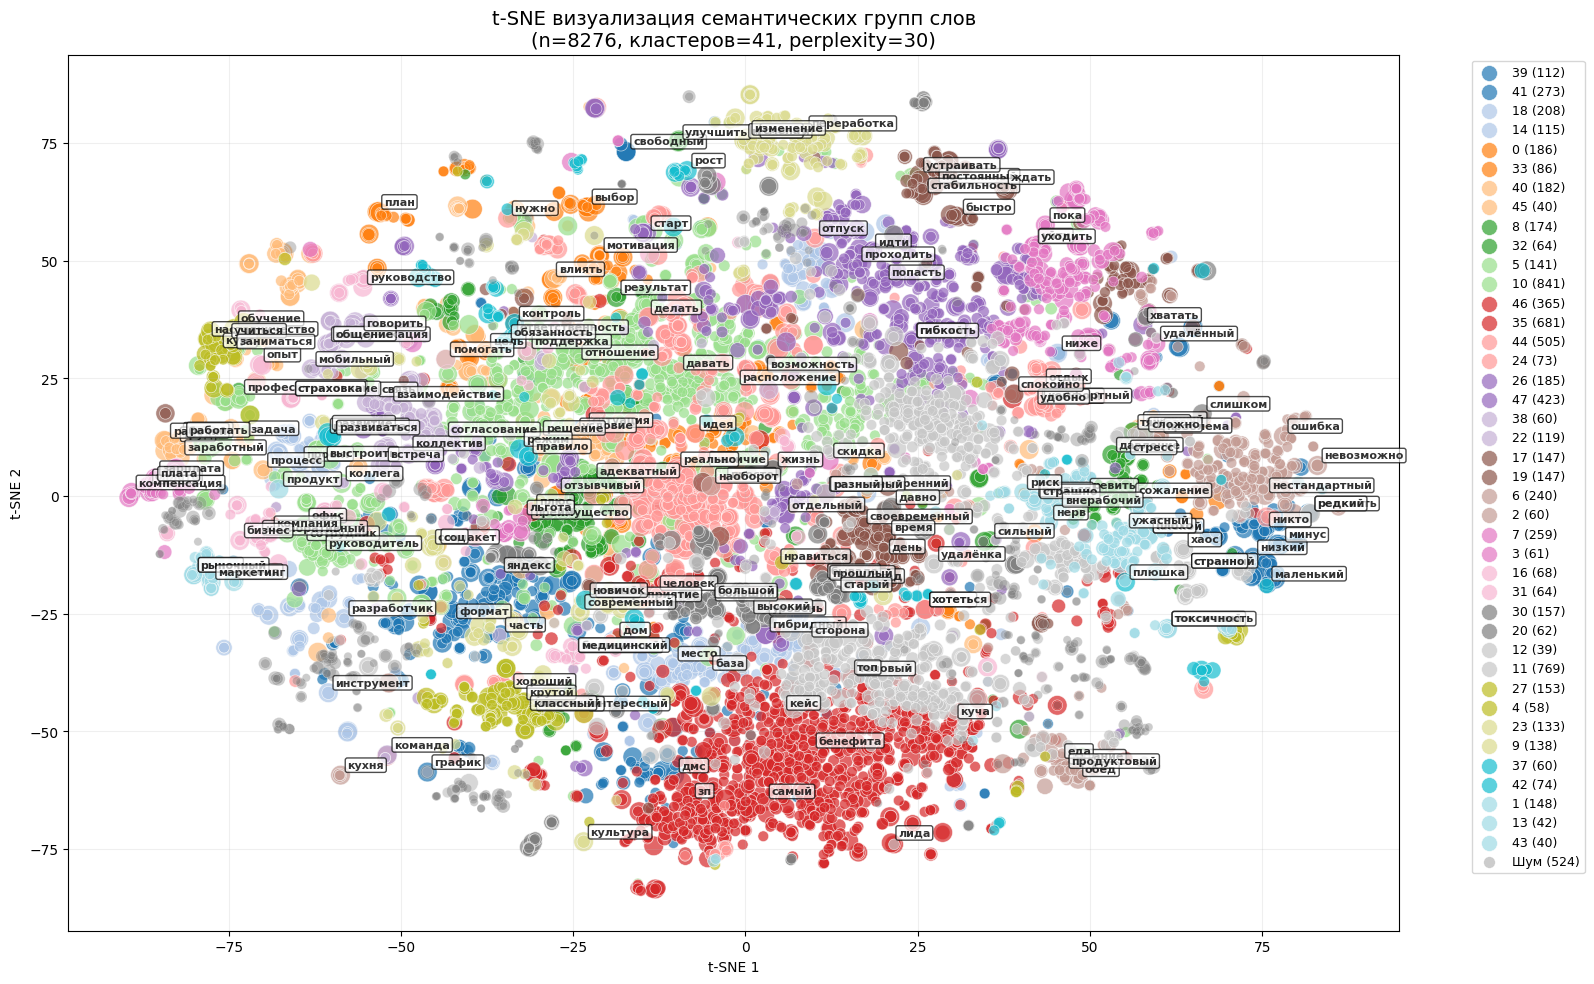

✓ t-SNE визуализация завершена


In [ ]:
# t-SNE визуализация

print("\n Визуализация t-SNE...")

# Извлекаем токены и создаем pair_names для визуализации
pair_names = significant_tokens
pair_vectors = embeddings

print(f"   Токенов: {len(pair_names)}")
print(f"   Размерность эмбеддингов: {pair_vectors.shape}")
print(f"   Кластеров: {len(clusters)}")
print(f"   Шум: {len(noise_cluster)}")


perplexity = min(30, max(5, len(pair_names) // 3))
if perplexity >= len(pair_names):
    perplexity = max(1, len(pair_names) - 1)

print(f"   Применяем t-SNE (perplexity={perplexity})...")
tsne = TSNE(n_components=2,
            perplexity=perplexity,
            random_state=42,
            init='pca',
            learning_rate='auto',
            n_iter=1000)
vectors_2d = tsne.fit_transform(pair_vectors)
print(f"   ✓ t-SNE завершен")

def find_token_indices(tokens_list):
    """Находит индексы токенов в pair_names"""
    indices = []
    for token_dict in tokens_list:
        # Ваши данные - словари с ключом 'token'
        if isinstance(token_dict, dict) and 'token' in token_dict:
            token_name = token_dict['token']
        elif isinstance(token_dict, str):
            token_name = token_dict
        else:
            continue

        # Ищем точное совпадение
        try:
            idx = pair_names.index(token_name)
            indices.append(idx)
        except ValueError:
            # Ищем частичное совпадение
            for i, name in enumerate(pair_names):
                if token_name in name or name in token_name:
                    indices.append(i)
                    break
    return indices


plt.figure(figsize=(16, 10))
plotted = False

# КЛАСТЕРЫ
if clusters:
    print(f"   Отрисовка {len(clusters)} кластеров...")
    colors = plt.cm.tab20(np.linspace(0, 1, len(clusters)))

    for i, (label, items) in enumerate(clusters.items()):
        idx = find_token_indices(items)

        if idx:
            plotted = True
            # Размер точки зависит от частоты
            sizes = []
            for item in items[:len(idx)]:
                if isinstance(item, dict) and 'frequency' in item:
                    size = 50 + (item['frequency'] * 10)
                else:
                    size = 80
                sizes.append(min(size, 200))  # ограничиваем максимальный размер

            plt.scatter(vectors_2d[idx, 0], vectors_2d[idx, 1],
                       c=[colors[i % len(colors)]],
                       s=sizes,
                       alpha=0.7,
                       label=f'{label} ({len(items)})',
                       edgecolors='white',
                       linewidth=0.5)

            # Подписываем топ-5 самых частых слов
            if len(idx) > 0:
                # Сортируем по частоте
                sorted_items = sorted(items, key=lambda x: x.get('frequency', 0), reverse=True)
                for j, item in enumerate(sorted_items[:5]):
                    token_idx = find_token_indices([item])
                    if token_idx:
                        pos = vectors_2d[token_idx[0]]
                        plt.annotate(item['token'][:15],
                                    (pos[0], pos[1]),
                                    xytext=(5, 5),
                                    textcoords='offset points',
                                    fontsize=8,
                                    alpha=0.8,
                                    weight='bold',
                                    bbox=dict(boxstyle='round,pad=0.2',
                                             facecolor='white',
                                             alpha=0.7))

# ШУМ
if noise_cluster:
    print(f"   Отрисовка шума ({len(noise_cluster)} точек)...")
    idx_noise = find_token_indices(noise_cluster)
    if idx_noise:
        plotted = True
        # Размер точек для шума
        sizes_noise = []
        for item in noise_cluster[:len(idx_noise)]:
            if isinstance(item, dict) and 'frequency' in item:
                size = 30 + (item['frequency'] * 5)
            else:
                size = 40
            sizes_noise.append(min(size, 100))

        plt.scatter(vectors_2d[idx_noise, 0], vectors_2d[idx_noise, 1],
                   c='gray',
                   s=sizes_noise,
                   alpha=0.4,
                   label=f'Шум ({len(noise_cluster)})',
                   edgecolors='white',
                   linewidth=0.3)


plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f't-SNE визуализация семантических групп слов\n'
          f'(n={len(pair_names)}, кластеров={len(clusters)}, perplexity={perplexity})',
          fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.2)
plt.tight_layout()

# Сохраняем в файл
plt.savefig('tsne_clusters.png', dpi=150, bbox_inches='tight')
print(f"   ✓ График сохранен в 'tsne_clusters.png'")

plt.show()
print(f"✓ t-SNE визуализация завершена")

In [ ]:
# Поскольку код очень тяжелый и думаетбольше 20 минут + расставляет кластеры в другом порядке - я решила выгрузить его документом и в дальнейшем рботать с данными из файла

from google.colab import files

df = pd.DataFrame([
    {'Кластер': cluster_id, 'Слово': item['token'], 'Частота': item['frequency']}
    for cluster_id, items in clusters.items()
    for item in items
] + [
    {'Кластер': 'Шум', 'Слово': item['token'], 'Частота': item['frequency']}
    for item in noise_cluster
])

filename = 'слова_по_кластерам.xlsx'
df.to_excel(filename, index=False)

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Документ для анализа необходимо загрузить в "файлы"
data = pd.read_excel('/content/слова_по_кластерам.xlsx', index_col=0)
data

,Слово,Частота
Кластер,,
39,маленький,193
39,никто,179
39,свободный,170
39,низкий,168
39,минус,165
...,...,...
Шум,лимон,1
Шум,барист,1
Шум,выпить,1


# **Не вошедшие в анализ действия**

Альтернативный путь - попытаться сначала выявить семантическое поле слов, которое я ищу, а затем - под него подбирать близки по значению слова из списка токенов

In [ ]:
# Определяем ключевые слова семантического поля. МИФ - золотой век в будущем
semantic_field = [
    # Будущее и перспектива
    "будущее", "перспектива", "завтра", "предстоящее", "грядущее",

    # Миссия и цель
    "миссия", "цель", "предназначение", "призвание", 'моральный долг', "социальное служение", 'нравственный долг',

    # Жертва и самоотдача
    "самопожертвование", "самоотдача", "гореть", "гореть идеей",

    # Смысл и значение
    "смысл", "значение", "суть", "идея", "содержание", "сущность",

    # Ценности и идеалы
    "ценность", "идеал", "принцип", "добро", "истина", "настоящее", "подлинный", "нужный", "важный",

    # Преобразование и развитие
    "преобразование", "трансформация", "изменение", "перемена", "метаморфоза",
    "превращение", "строительство", "строить", "улучшение", "полезный",
    "реальный", "создание", "строительство", "развивать", "развитие", "будущий",
    "прогрессивный", "прогресс", "модернизация", 'импрувить'
]

In [ ]:
# ЯЧЕЙКА: КЛАСТЕРИЗАЦИЯ SEMANTIC_FIELD И ПОИСК БЛИЗКИХ СЛОВ

print(f"   semantic_field: {len(semantic_field)} слов")
print(f"   all_tokens: {len(all_tokens):,} токенов")
print(f"   Уникальных токенов: {len(set(all_tokens)):,}")

# Получаем эмбеддинги для semantic_field
semantic_embeddings = model.encode(semantic_field)

# Определяем диапазон для подбора количества кластеров
max_clusters = min(20, len(semantic_field) // 3)  # Не больше 20 кластеров
max_clusters = max(max_clusters, 3)  # Минимум 3 кластера

print(f"   Будет протестировано от 3 до {max_clusters} кластеров")

best_clusters = {}
best_avg_distance = float('inf')
optimal_k = 3

for k in range(3, max_clusters + 1):
    print(f"   Тестируем {k} кластеров...", end=" ")

    # Кластеризация
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(semantic_embeddings)

    # Вычисляем расстояния до центроидов
    distances = kmeans.transform(semantic_embeddings)
    min_distances = distances.min(axis=1)

    # Формируем кластеры
    clusters_temp = defaultdict(list)
    for word, label, distance in zip(semantic_field, labels, min_distances):
        clusters_temp[label].append({'word': word, 'distance': distance})

    # Вычисляем среднее расстояние для каждого кластера
    clusters_with_stats = {}
    total_avg_distance = 0

    for label in clusters_temp:
        words = clusters_temp[label]
        avg_distance = np.mean([item['distance'] for item in words])
        total_avg_distance += avg_distance

        # Сортируем слова по расстоянию (от ближайшего к центроиду)
        words.sort(key=lambda x: x['distance'])
        clusters_with_stats[label] = {
            'words': words,
            'avg_distance': avg_distance,
            'centroid': kmeans.cluster_centers_[label]
        }

    overall_avg_distance = total_avg_distance / len(clusters_with_stats)

    # Ищем оптимальное количество кластеров (минимальное среднее расстояние)
    if overall_avg_distance < best_avg_distance:
        best_avg_distance = overall_avg_distance
        best_clusters = clusters_with_stats
        optimal_k = k
        print(f"✓ Лучший результат (ср. расст.: {overall_avg_distance:.4f})")
    else:
        print(f"✗ (ср. расст.: {overall_avg_distance:.4f})")

print(f"\n ОПТИМАЛЬНОЕ КОЛИЧЕСТВО КЛАСТЕРОВ: {optimal_k}")
print(f" СРЕДНЕЕ РАССТОЯНИЕ: {best_avg_distance:.4f}")
print(" КЛАСТЕРЫ SEMANTIC_FIELD")


clusters = best_clusters

for label in sorted(clusters.keys()):
    cluster_data = clusters[label]
    words = [item['word'] for item in cluster_data['words']]

    print(f"\n КЛАСТЕР {label} ({len(words)} слов):")
    print(f"   Среднее расстояние: {cluster_data['avg_distance']:.4f}")
    print(f"   Слова: {', '.join(words[:10])}{'...' if len(words) > 10 else ''}")

   semantic_field: 51 слов
   all_tokens: 147,863 токенов
   Уникальных токенов: 8,276
   Будет протестировано от 3 до 17 кластеров
   Тестируем 3 кластеров... ✓ Лучший результат (ср. расст.: 2.5141)
   Тестируем 4 кластеров... ✓ Лучший результат (ср. расст.: 1.7382)
   Тестируем 5 кластеров... ✗ (ср. расст.: 1.7744)
   Тестируем 6 кластеров... ✓ Лучший результат (ср. расст.: 1.4733)
   Тестируем 7 кластеров... ✓ Лучший результат (ср. расст.: 1.3045)
   Тестируем 8 кластеров... ✗ (ср. расст.: 1.3712)
   Тестируем 9 кластеров... ✓ Лучший результат (ср. расст.: 1.2853)
   Тестируем 10 кластеров... ✓ Лучший результат (ср. расст.: 0.9950)
   Тестируем 11 кластеров... ✗ (ср. расст.: 1.3482)
   Тестируем 12 кластеров... ✗ (ср. расст.: 1.1050)
   Тестируем 13 кластеров... ✓ Лучший результат (ср. расст.: 0.8177)
   Тестируем 14 кластеров... ✗ (ср. расст.: 0.8721)
   Тестируем 15 кластеров... ✓ Лучший результат (ср. расст.: 0.7948)
   Тестируем 16 кластеров... ✓ Лучший результат (ср. расст.: 0.

In [ ]:


#ПОИСК БЛИЗКИХ СЛОВ ИЗ ALL_TOKENS

unique_tokens = list(set(all_tokens))
print(f"   Создаю эмбеддинги...")
batch_size = 1000
token_embeddings_dict = {}

for i in range(0, len(unique_tokens), batch_size):
    batch = unique_tokens[i:i+batch_size]
    batch_embeddings = model.encode(batch)

    for token, embedding in zip(batch, batch_embeddings):
        token_embeddings_dict[token] = embedding

    if (i + batch_size) % 5000 == 0:
        print(f"     Обработано {min(i+batch_size, len(unique_tokens)):,}/{len(unique_tokens):,}")

print(f"Создано эмбеддингов: {len(token_embeddings_dict):,}")

# 8. ПОИСК БЛИЗКИХ СЛОВ ДЛЯ КАЖДОГО КЛАСТЕРА
print(f"\n ПОИСК БЛИЗКИХ СЛОВ ДЛЯ КАЖДОГО КЛАСТЕРА...")

clusters_with_matches = {}
SIMILARITY_THRESHOLD = 0.6  # Порог косинусного сходства

for label, cluster_data in clusters.items():
    print(f"\n   🔍 Кластер {label}:")

    # Центроид кластера
    centroid = cluster_data['centroid']

    # Слова из semantic_field в этом кластере
    semantic_words = [item['word'] for item in cluster_data['words']]
    print(f"     Ядро: {len(semantic_words)} слов")

    # Ищем близкие слова из all_tokens
    matches = []

    for token, embedding in token_embeddings_dict.items():
        # Пропускаем слова, которые уже в semantic_field
        if token in semantic_field:
            continue

        # Вычисляем косинусное сходство с центроидом
        similarity = cosine_similarity([centroid], [embedding])[0][0]

        if similarity >= SIMILARITY_THRESHOLD:
            # Также вычисляем сходство с ближайшим словом из кластера
            max_word_similarity = 0
            closest_word = ""

            for semantic_word in semantic_words:
                if semantic_word in token_embeddings_dict:
                    sem_embedding = token_embeddings_dict[semantic_word]
                    word_similarity = cosine_similarity([embedding], [sem_embedding])[0][0]

                    if word_similarity > max_word_similarity:
                        max_word_similarity = word_similarity
                        closest_word = semantic_word

            matches.append({
                'token': token,
                'similarity_to_centroid': similarity,
                'similarity_to_closest_word': max_word_similarity,
                'closest_semantic_word': closest_word
            })

    # Сортируем по сходству с центроидом
    matches.sort(key=lambda x: x['similarity_to_centroid'], reverse=True)

    clusters_with_matches[label] = {
        'semantic_words': semantic_words,
        'matches': matches,
        'centroid': centroid,
        'avg_distance': cluster_data['avg_distance']
    }

    print(f"     Найдено близких слов: {len(matches)}")


total_matches = sum(len(data['matches']) for data in clusters_with_matches.values())
print(f"\n ВСЕГО НАЙДЕНО БЛИЗКИХ СЛОВ: {total_matches}")

# Выводим результаты по кластерам
for label, data in clusters_with_matches.items():
    semantic_words = data['semantic_words']
    matches = data['matches']

    print(f"\n КЛАСТЕР {label}:")
    print(f"   Ядро ({len(semantic_words)}): {', '.join(semantic_words[:5])}{'...' if len(semantic_words) > 5 else ''}")
    print(f"   Найдено близких слов: {len(matches)}")

    if matches:
        print(f"Топ-10 самых близких:")
        for i, match in enumerate(matches[:10], 1):
            print(f"     {i:2}. {match['token']:25} → {match['closest_semantic_word']:15} "
                  f"(к центроиду: {match['similarity_to_centroid']:.3f}, "
                  f"к слову: {match['similarity_to_closest_word']:.3f})")


# Собираем все найденные слова
all_found_tokens = set()
all_match_details = []

for label, data in clusters_with_matches.items():
    for match in data['matches']:
        all_found_tokens.add(match['token'])
        all_match_details.append({
            'token': match['token'],
            'cluster': label,
            'similarity_to_centroid': match['similarity_to_centroid'],
            'closest_semantic_word': match['closest_semantic_word']
        })

print(f"   Кластеров: {len(clusters_with_matches)}")
print(f"   Уникальных найденных слов: {len(all_found_tokens)}")
print(f"   Всего совпадений: {total_matches}")

# Статистика по сходству
if all_match_details:
    similarities = [m['similarity_to_centroid'] for m in all_match_details]

    print(f"\n СТАТИСТИКА ПО СХОДСТВУ:")
    print(f"   Среднее: {np.mean(similarities):.3f}")
    print(f"   Медиана: {np.median(similarities):.3f}")
    print(f"   Минимум: {min(similarities):.3f}")
    print(f"   Максимум: {max(similarities):.3f}")

    # Распределение
    print(f"\n РАСПРЕДЕЛЕНИЕ ПО СХОДСТВУ:")
    ranges = [(0.9, 1.0), (0.8, 0.9), (0.7, 0.8), (0.6, 0.7)]
    for low, high in ranges:
        count = sum(1 for s in similarities if low <= s < high)
        if count > 0:
            percent = count / len(similarities) * 100
            print(f"   {low:.1f}-{high:.1f}: {count} слов ({percent:.1f}%)")


   Создаю эмбеддинги...
     Обработано 5,000/8,276
Создано эмбеддингов: 8,276

 ПОИСК БЛИЗКИХ СЛОВ ДЛЯ КАЖДОГО КЛАСТЕРА...

   🔍 Кластер 2:
     Ядро: 5 слов
     Найдено близких слов: 3421

   🔍 Кластер 6:
     Ядро: 16 слов
     Найдено близких слов: 6654

   🔍 Кластер 10:
     Ядро: 1 слов
     Найдено близких слов: 695

   🔍 Кластер 7:
     Ядро: 5 слов
     Найдено близких слов: 5330

   🔍 Кластер 5:
     Ядро: 2 слов
     Найдено близких слов: 47

   🔍 Кластер 13:
     Ядро: 1 слов
     Найдено близких слов: 51

   🔍 Кластер 8:
     Ядро: 1 слов
     Найдено близких слов: 18

   🔍 Кластер 9:
     Ядро: 2 слов
     Найдено близких слов: 1395

   🔍 Кластер 1:
     Ядро: 3 слов
     Найдено близких слов: 6079

   🔍 Кластер 3:
     Ядро: 3 слов
     Найдено близких слов: 3397

   🔍 Кластер 12:
     Ядро: 2 слов
     Найдено близких слов: 751

   🔍 Кластер 14:
     Ядро: 1 слов
     Найдено близких слов: 11

   🔍 Кластер 4:
     Ядро: 3 слов
     Найдено близких слов: 2637

   🔍 Клас

In [ ]:
# Проверка наличия "яндекс" в all_tokens
found = any('яндекс' in tokens for tokens in all_tokens)
print(f"'яндекс' найден: {found}")

# Подсчет количества вхождений
total_count = sum(tokens.count('яндекс') for tokens in all_tokens)
print(f"Всего вхождений: {total_count}")

'яндекс' найден: True
Всего вхождений: 524


In [ ]:
# Ищем слова, рядом с "Яндекс"
yandex_positions = [i for i, word in enumerate(all_tokens) if word == 'яндекс']
print(f"Найдено 'яндекс' на позициях: {len(yandex_positions)}")

# Собираем слова в окне 2
neighbors = []

for pos in yandex_positions:
    # Слова слева
    start = max(0, pos - 2)
    left_words = all_tokens[start:pos]

    # Слова справа
    end = min(len(all_tokens), pos + 2)
    right_words = all_tokens[pos + 1:end]

    neighbors.extend(left_words + right_words)

print(f"\nСобрано соседних слов: {len(neighbors):,}")

if neighbors:
    # Считаем частотность
    counter = Counter(neighbors)

    print(f"Уникальных соседей: {len(counter):,}")
    print(f"Среднее слов на 1 'яндекс': {len(neighbors)/len(yandex_positions):.1f}")

    # Слова с частотой >= 5
    frequent = [(w, c) for w, c in counter.items() if c >= 5]
    frequent.sort(key=lambda x: x[1], reverse=True)

    print(f"\nСлова с частотой >= 3 ({len(frequent)}):")
    for w, c in frequent[:100]:  # топ
        print(f"{w:20} {c:4}")
else:
    print("Соседей не найдено!")

Найдено 'яндекс' на позициях: 518

Собрано соседних слов: 1,554
Уникальных соседей: 782
Среднее слов на 1 'яндекс': 3.0

Слова с частотой >= 3 (54):
работать               58
работа                 45
мероприятие            35
корпоративный          22
год                    22
компания               21
прийти                 19
попасть                14
нравиться              14
офис                   13
система                11
страхование            10
задача                 10
хороший                10
сервис                 10
преимущество           10
наставничество         10
весь                    9
сотрудник               9
реально                 9
время                   8
обучение                8
стать                   8
уровень                 7
питание                 7
опыт                    7
делать                  7
крутой                  7
плюс                    7
еда                     6
знать                   6
команда                 6
круто              